In [1]:
import imbrium
print(imbrium.__version__)

0.1.8


In [2]:
from imbrium.predictors.univarstandard import *

In [3]:
data = pd.read_csv('CaliforniaHousing.csv')
data = data['target']

## UnivarMultiStep

Epoch 1/7
1650/1650 [==============================] - 3s 2ms/step - loss: 0.6799 - mean_squared_error: 0.6799 - val_loss: 0.5238 - val_mean_squared_error: 0.5238
Epoch 2/7
1650/1650 [==============================] - 3s 2ms/step - loss: 0.5371 - mean_squared_error: 0.5371 - val_loss: 0.5400 - val_mean_squared_error: 0.5400
Epoch 2: early stopping


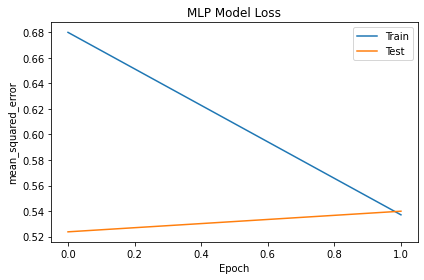

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                150       
                                                                 
 dense_1 (Dense)             (None, 5)                 130       
                                                                 
 dense_2 (Dense)             (None, 25)                150       
                                                                 
 dense_3 (Dense)             (None, 10)                260       
                                                                 
Total params: 690
Trainable params: 690
Non-trainable params: 0
_________________________________________________________________


In [4]:
predictor1 = BasicMultStepUniVar(steps_past =  5, steps_future = 10, data = data, scale = '')
predictor1.create_mlp(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (25, 'relu'), 'layer1': (5,'relu'), 'layer2': (25, 'relu')})
predictor1.fit_model(epochs = 7, show_progress= 1, validation_split = 0.20, batch_size = 10, monitor='val_loss', patience=1, min_delta = 0, verbose = 1)
predictor1.show_performance()
predictor1.predict(data.tail(5))
predictor1.model_blueprint()

Epoch 1/7
1650/1650 [==============================] - 8s 4ms/step - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.0218 - val_mean_squared_error: 0.0218
Epoch 2/7
1650/1650 [==============================] - 6s 4ms/step - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0226 - val_mean_squared_error: 0.0226
Epoch 2: early stopping


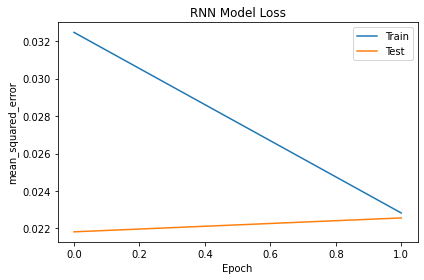

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5, 20)             440       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 5, 25)             1150      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 5)                 155       
                                                                 
 dense_4 (Dense)             (None, 10)                60        
                                                                 
Total params: 1,805
Trainable params: 1,805
Non-trainable params: 0
_________________________________________________________________


In [5]:
predictor2 = BasicMultStepUniVar(steps_past =  5, steps_future = 10, data = data, scale = 'normalize')
predictor2.create_rnn(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (20, 'relu'), 'layer1': (25,'relu'), 'layer2': (5, 'relu')})
predictor2.fit_model(epochs = 7, show_progress= 1, validation_split = 0.20, batch_size = 10, monitor='val_loss', patience=1, min_delta = 0, verbose = 1)
predictor2.show_performance()
predictor2.predict(data.tail(5))
predictor2.model_blueprint()

Epoch 1/10
1650/1650 [==============================] - 11s 6ms/step - loss: 0.5819 - mean_squared_error: 0.5819 - val_loss: 0.5303 - val_mean_squared_error: 0.5303
Epoch 2/10
1650/1650 [==============================] - 9s 6ms/step - loss: 0.4399 - mean_squared_error: 0.4399 - val_loss: 0.4516 - val_mean_squared_error: 0.4516
Epoch 3/10
1650/1650 [==============================] - 9s 5ms/step - loss: 0.4154 - mean_squared_error: 0.4154 - val_loss: 0.4182 - val_mean_squared_error: 0.4182
Epoch 4/10
1650/1650 [==============================] - 9s 5ms/step - loss: 0.4060 - mean_squared_error: 0.4060 - val_loss: 0.4018 - val_mean_squared_error: 0.4018
Epoch 5/10
1650/1650 [==============================] - 8s 5ms/step - loss: 0.4019 - mean_squared_error: 0.4019 - val_loss: 0.3970 - val_mean_squared_error: 0.3970
Epoch 6/10
1650/1650 [==============================] - 9s 5ms/step - loss: 0.4003 - mean_squared_error: 0.4003 - val_loss: 0.3940 - val_mean_squared_error: 0.3940
Epoch 7/10
1650

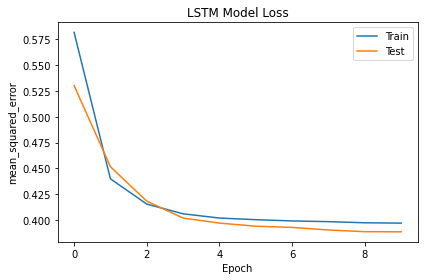

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 20)             1760      
                                                                 
 lstm_1 (LSTM)               (None, 5, 25)             4600      
                                                                 
 lstm_2 (LSTM)               (None, 5)                 620       
                                                                 
 dense_5 (Dense)             (None, 10)                60        
                                                                 
Total params: 7,040
Trainable params: 7,040
Non-trainable params: 0
_________________________________________________________________


In [6]:
predictor3 = BasicMultStepUniVar(steps_past =  5, steps_future = 10, data = data, scale = 'standard')
predictor3.create_lstm(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (20, 'relu'), 'layer1': (25,'relu'), 'layer2': (5, 'relu')})
predictor3.fit_model(epochs = 10, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor3.show_performance()
predictor3.predict(data.tail(5))
predictor3.model_blueprint()

Epoch 1/2
1650/1650 [==============================] - 10s 5ms/step - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch 2/2
1650/1650 [==============================] - 9s 5ms/step - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0221 - val_mean_squared_error: 0.0221


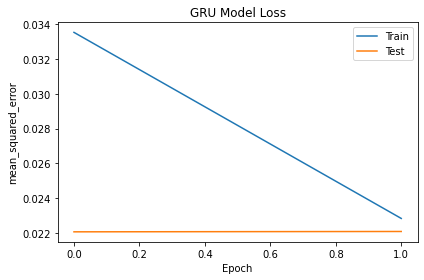

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 5, 20)             1380      
                                                                 
 gru_1 (GRU)                 (None, 5, 25)             3525      
                                                                 
 gru_2 (GRU)                 (None, 5)                 480       
                                                                 
 dense_6 (Dense)             (None, 10)                60        
                                                                 
Total params: 5,445
Trainable params: 5,445
Non-trainable params: 0
_________________________________________________________________


In [7]:
predictor4 = BasicMultStepUniVar(steps_past =  5, steps_future = 10, data = data, scale = 'minmax')
predictor4.create_gru(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (20, 'relu'), 'layer1': (25,'relu'), 'layer2': (5, 'relu')})
predictor4.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor4.show_performance()
predictor4.predict(data.tail(5))
predictor4.model_blueprint()

Epoch 1/2
1650/1650 [==============================] - 3s 2ms/step - loss: 3.1740 - mean_squared_error: 3.1740 - val_loss: 2.3908 - val_mean_squared_error: 2.3908
Epoch 2/2
1650/1650 [==============================] - 3s 2ms/step - loss: 1.4507 - mean_squared_error: 1.4507 - val_loss: 1.5810 - val_mean_squared_error: 1.5810


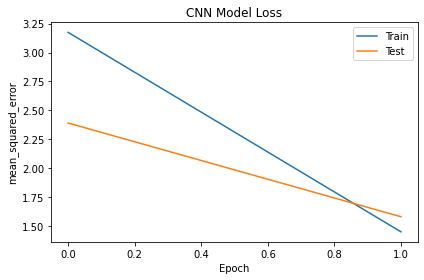

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 8)              16        
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 4)              36        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 4)             0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense_7 (Dense)             (None, 5)                 45        
                                                                 
 dense_8 (Dense)             (None, 10)                60        
                                                      

In [8]:
predictor5 = BasicMultStepUniVar(steps_past =  5, steps_future = 10, data = data, scale = '')
predictor5.create_cnn(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu')})
predictor5.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor5.show_performance()
predictor5.predict(data.tail(5))
predictor5.model_blueprint()

Epoch 1/2
1650/1650 [==============================] - 8s 4ms/step - loss: 0.4734 - mean_squared_error: 0.4734 - val_loss: 0.3948 - val_mean_squared_error: 0.3948
Epoch 2/2
1650/1650 [==============================] - 6s 3ms/step - loss: 0.3981 - mean_squared_error: 0.3981 - val_loss: 0.3883 - val_mean_squared_error: 0.3883


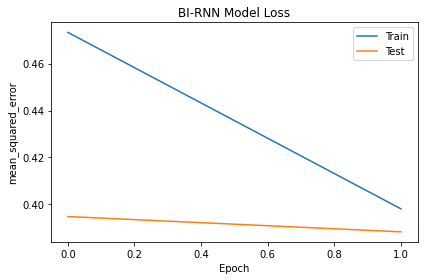

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 5, 30)            510       
 l)                                                              
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 5)                 180       
                                                                 
 dense_9 (Dense)             (None, 10)                60        
                                                                 
Total params: 750
Trainable params: 750
Non-trainable params: 0
_________________________________________________________________


In [9]:
predictor6 = BasicMultStepUniVar(steps_past =  5, steps_future = 10, data = data, scale = 'standard')
predictor6.create_birnn(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (15, 'relu'), 'layer1': (5, 'relu')})
predictor6.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor6.show_performance()
predictor6.predict(data.tail(5))
predictor6.model_blueprint()

Epoch 1/7
1650/1650 [==============================] - 9s 5ms/step - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch 2/7
1650/1650 [==============================] - 12s 7ms/step - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0220 - val_mean_squared_error: 0.0220
Epoch 3/7
1650/1650 [==============================] - 9s 5ms/step - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch 4/7
1650/1650 [==============================] - 9s 5ms/step - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0220 - val_mean_squared_error: 0.0220
Epoch 4: early stopping


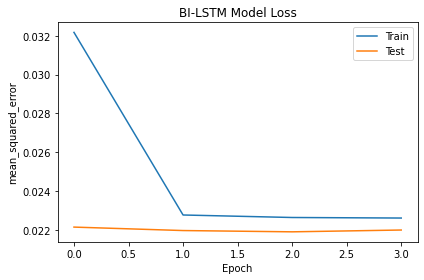

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 5, 30)            2040      
 nal)                                                            
                                                                 
 lstm_4 (LSTM)               (None, 5)                 720       
                                                                 
 dense_10 (Dense)            (None, 10)                60        
                                                                 
Total params: 2,820
Trainable params: 2,820
Non-trainable params: 0
_________________________________________________________________


In [10]:
predictor7 = BasicMultStepUniVar(steps_past =  5, steps_future = 10, data = data, scale = 'minmax')
predictor7.create_bilstm(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (15, 'relu'), 'layer1': (5, 'relu')})
predictor7.fit_model(epochs = 7, show_progress= 1, validation_split = 0.20, batch_size = 10, monitor='val_loss', patience=1, min_delta = 0, verbose = 1)
predictor7.show_performance()
predictor7.predict(data.tail(5))
predictor7.model_blueprint()

Epoch 1/2
1650/1650 [==============================] - 10s 5ms/step - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.0208 - val_mean_squared_error: 0.0208
Epoch 2/2
1650/1650 [==============================] - 8s 5ms/step - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0210 - val_mean_squared_error: 0.0210


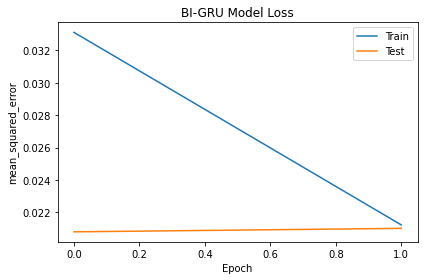

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 5, 30)            1620      
 nal)                                                            
                                                                 
 gru_4 (GRU)                 (None, 5)                 555       
                                                                 
 dense_11 (Dense)            (None, 10)                60        
                                                                 
Total params: 2,235
Trainable params: 2,235
Non-trainable params: 0
_________________________________________________________________


In [11]:
predictor8 = BasicMultStepUniVar(steps_past =  5, steps_future = 10, data = data, scale = 'maxabs')
predictor8.create_bigru(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (15, 'relu'), 'layer1': (5, 'relu')})
predictor8.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor8.show_performance()
predictor8.predict(data.tail(5))
predictor8.model_blueprint()

Epoch 1/2
1650/1650 [==============================] - 13s 6ms/step - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 2/2
1650/1650 [==============================] - 12s 7ms/step - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0237 - val_mean_squared_error: 0.0237


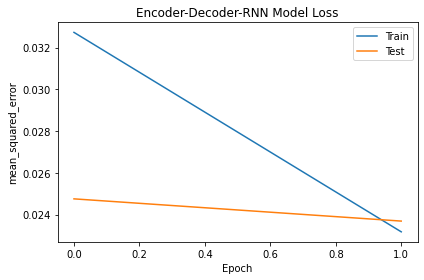

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 5, 50)             2600      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 5)                 280       
                                                                 
 repeat_vector (RepeatVector  (None, 10, 5)            0         
 )                                                               
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 10, 5)             55        
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 10, 1)             7         
                                                                 
 time_distributed (TimeDistr  (None, 10, 1)            2         
 ibuted)                                              

In [12]:
predictor9 = BasicMultStepUniVar(steps_past =  5, steps_future = 10, data = data, scale = 'normalize')
predictor9.create_encdec_rnn(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (50, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (1, 'relu')})
predictor9.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor9.show_performance()
predictor9.predict(data.tail(5))
predictor9.model_blueprint()

Epoch 1/2
1650/1650 [==============================] - 18s 9ms/step - loss: 0.0688 - mean_squared_error: 0.0688 - val_loss: 0.0648 - val_mean_squared_error: 0.0648
Epoch 2/2
1650/1650 [==============================] - 14s 8ms/step - loss: 0.0548 - mean_squared_error: 0.0548 - val_loss: 0.0649 - val_mean_squared_error: 0.0649


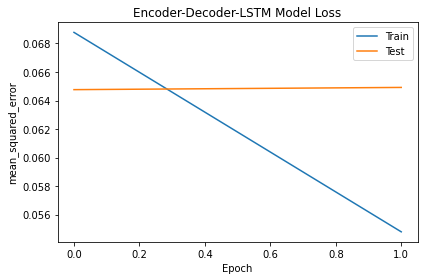

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 5, 50)             10400     
                                                                 
 lstm_6 (LSTM)               (None, 5)                 1120      
                                                                 
 repeat_vector_1 (RepeatVect  (None, 10, 5)            0         
 or)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 10, 5)             220       
                                                                 
 lstm_8 (LSTM)               (None, 10, 1)             28        
                                                                 
 time_distributed_1 (TimeDis  (None, 10, 1)            2         
 tributed)                                            

In [13]:
predictor10 = BasicMultStepUniVar(steps_past =  5, steps_future = 10, data = data, scale = 'normalize')
predictor10.create_encdec_lstm(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (50, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (1, 'relu')})
predictor10.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor10.show_performance()
predictor10.predict(data.tail(5))
predictor10.model_blueprint()

Epoch 1/2
1650/1650 [==============================] - 12s 6ms/step - loss: 0.0690 - mean_squared_error: 0.0690 - val_loss: 0.0640 - val_mean_squared_error: 0.0640
Epoch 2/2
1650/1650 [==============================] - 10s 6ms/step - loss: 0.0548 - mean_squared_error: 0.0548 - val_loss: 0.0656 - val_mean_squared_error: 0.0656


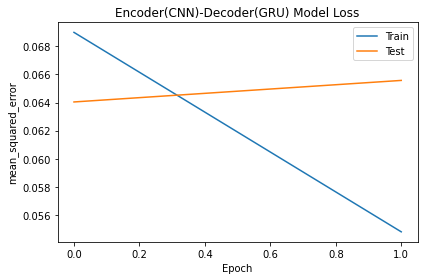

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 5, 8)              16        
                                                                 
 conv1d_3 (Conv1D)           (None, 5, 4)              36        
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 2, 4)             0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8)                 0         
                                                                 
 repeat_vector_2 (RepeatVect  (None, 10, 8)            0         
 or)                                                             
                                                                 
 gru_5 (GRU)                 (None, 10, 5)           

In [14]:
predictor11 = BasicMultStepUniVar(steps_past =  5, steps_future = 10, data = data, scale = 'normalize')
predictor11.create_encdec_cnn(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (1, 'relu')})
predictor11.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor11.show_performance()
predictor11.predict(data.tail(5))
predictor11.model_blueprint()

Epoch 1/7
1650/1650 [==============================] - 17s 9ms/step - loss: 0.0690 - mean_squared_error: 0.0690 - val_loss: 0.0638 - val_mean_squared_error: 0.0638
Epoch 2/7
1650/1650 [==============================] - 14s 8ms/step - loss: 0.0548 - mean_squared_error: 0.0548 - val_loss: 0.0637 - val_mean_squared_error: 0.0637
Epoch 3/7
1650/1650 [==============================] - 14s 8ms/step - loss: 0.0548 - mean_squared_error: 0.0548 - val_loss: 0.0633 - val_mean_squared_error: 0.0633
Epoch 4/7
1650/1650 [==============================] - 14s 8ms/step - loss: 0.0548 - mean_squared_error: 0.0548 - val_loss: 0.0643 - val_mean_squared_error: 0.0643
Epoch 4: early stopping


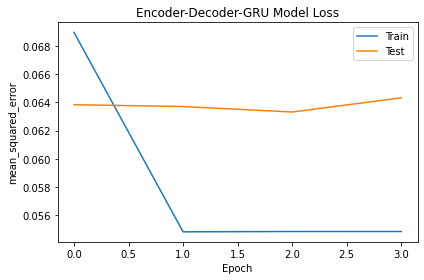

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_7 (GRU)                 (None, 5, 50)             7950      
                                                                 
 gru_8 (GRU)                 (None, 5)                 855       
                                                                 
 repeat_vector_3 (RepeatVect  (None, 10, 5)            0         
 or)                                                             
                                                                 
 gru_9 (GRU)                 (None, 10, 5)             180       
                                                                 
 gru_10 (GRU)                (None, 10, 1)             24        
                                                                 
 time_distributed_3 (TimeDis  (None, 10, 1)            2         
 tributed)                                           

In [15]:
predictor12 = BasicMultStepUniVar(steps_past =  5, steps_future = 10, data = data, scale = 'minmax')
predictor12.create_encdec_gru(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (50, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (1, 'relu')})
predictor12.fit_model(epochs = 7, show_progress= 1, validation_split = 0.20, batch_size = 10, monitor='val_loss', patience=1, min_delta = 0, verbose = 1)
predictor12.show_performance()
predictor12.predict(data.tail(5))
predictor12.model_blueprint()

In [16]:
data.tail(5)

20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, dtype: float64

In [17]:
predictor12.save_model()

INFO:tensorflow:Assets written to: C:\Users\Max\Desktop\inProgress\AImbriumTestingGround\assets


In [18]:
load = BasicMultStepUniVar(steps_past =  5, steps_future = 10)

In [19]:
load.set_model_id('Loaded Model')

In [20]:
load.load_model('univarstandard')

In [21]:
load.predict(data.tail(5))

,Loaded Model
0,0.841771
1,0.811723
2,0.779695
3,0.751393
4,0.735049
5,0.726088
6,0.721185
7,0.718403
8,0.716792
9,0.715845


In [22]:
from imbrium.predictors.univarhybrid import *

Epoch 1/10
1650/1650 [==============================] - 7s 3ms/step - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 2/10
1650/1650 [==============================] - 5s 3ms/step - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch 3/10
1650/1650 [==============================] - 5s 3ms/step - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0208 - val_mean_squared_error: 0.0208
Epoch 4/10
1650/1650 [==============================] - 5s 3ms/step - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch 5/10
1650/1650 [==============================] - 5s 3ms/step - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 6/10
1650/1650 [==============================] - 5s 3ms/step - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch 7/10
1650/

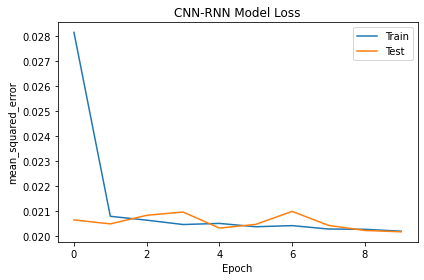

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_4 (TimeDis  (None, None, 5, 8)       16        
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, None, 5, 4)       36        
 tributed)                                                       
                                                                 
 time_distributed_6 (TimeDis  (None, None, 2, 4)       0         
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, None, 8)          0         
 tributed)                                                       
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, None, 25)        

In [23]:
predictor1 = HybridMultStepUniVar(sub_seq = 2, steps_past = 10, steps_future = 5, data = data, scale = 'maxabs')
predictor1.create_cnnrnn(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (25, 'relu'), 'layer4': (10, 'relu')})
predictor1.fit_model(epochs = 10, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor1.show_performance()
predictor1.predict(data.tail(10))
predictor1.model_blueprint()

Epoch 1/2
1650/1650 [==============================] - 6s 3ms/step - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0215 - val_mean_squared_error: 0.0215
Epoch 2/2
1650/1650 [==============================] - 5s 3ms/step - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0224 - val_mean_squared_error: 0.0224


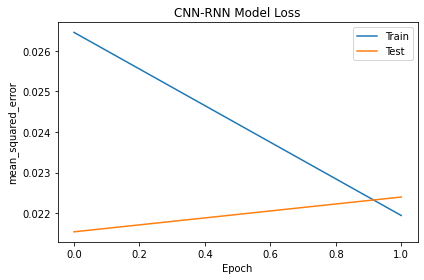

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_8 (TimeDis  (None, None, 5, 8)       16        
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, None, 5, 4)       36        
 tributed)                                                       
                                                                 
 time_distributed_10 (TimeDi  (None, None, 2, 4)       0         
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, None, 8)          0         
 stributed)                                                      
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, None, 25)        

In [24]:
predictor1 = HybridMultStepUniVar(sub_seq = 2, steps_past = 10, steps_future = 5, data = data, scale = 'normalize')
predictor1.create_cnnrnn(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (25, 'relu'), 'layer4': (10, 'relu')})
predictor1.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor1.show_performance()
predictor1.predict(data.tail(10))
predictor1.model_blueprint()

Epoch 1/7
1650/1650 [==============================] - 7s 3ms/step - loss: 0.4416 - mean_squared_error: 0.4416 - val_loss: 0.3647 - val_mean_squared_error: 0.3647
Epoch 2/7
1650/1650 [==============================] - 5s 3ms/step - loss: 0.3707 - mean_squared_error: 0.3707 - val_loss: 0.3677 - val_mean_squared_error: 0.3677
Epoch 2: early stopping


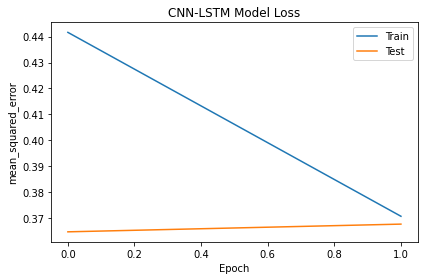

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_12 (TimeDi  (None, None, 5, 8)       16        
 stributed)                                                      
                                                                 
 time_distributed_13 (TimeDi  (None, None, 5, 4)       36        
 stributed)                                                      
                                                                 
 time_distributed_14 (TimeDi  (None, None, 2, 4)       0         
 stributed)                                                      
                                                                 
 time_distributed_15 (TimeDi  (None, None, 8)          0         
 stributed)                                                      
                                                                 
 lstm_9 (LSTM)               (None, None, 25)        

In [25]:
predictor1 = HybridMultStepUniVar(sub_seq = 2, steps_past = 10, steps_future = 5, data = data, scale = 'standard')
predictor1.create_cnnlstm(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (25, 'relu'), 'layer4': (10, 'relu')})
predictor1.fit_model(epochs = 7, show_progress= 1, validation_split = 0.20, batch_size = 10, monitor='val_loss', patience=1, min_delta = 0, verbose = 1)
predictor1.show_performance()
predictor1.predict(data.tail(10))
predictor1.model_blueprint()

Epoch 1/2
1650/1650 [==============================] - 8s 4ms/step - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch 2/2
1650/1650 [==============================] - 6s 3ms/step - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0222 - val_mean_squared_error: 0.0222


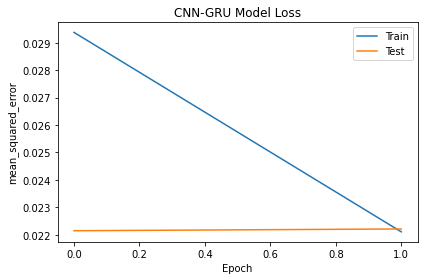

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_16 (TimeDi  (None, None, 5, 8)       16        
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, None, 5, 4)       36        
 stributed)                                                      
                                                                 
 time_distributed_18 (TimeDi  (None, None, 2, 4)       0         
 stributed)                                                      
                                                                 
 time_distributed_19 (TimeDi  (None, None, 8)          0         
 stributed)                                                      
                                                                 
 gru_11 (GRU)                (None, None, 25)        

In [26]:
predictor1 = HybridMultStepUniVar(sub_seq = 2, steps_past = 10, steps_future = 5, data = data, scale = 'minmax')
predictor1.create_cnngru(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (25, 'relu'), 'layer4': (10, 'relu')})
predictor1.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor1.show_performance()
predictor1.predict(data.tail(10))
predictor1.model_blueprint()

Epoch 1/2
1650/1650 [==============================] - 8s 4ms/step - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0226 - val_mean_squared_error: 0.0226
Epoch 2/2
1650/1650 [==============================] - 6s 3ms/step - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0220 - val_mean_squared_error: 0.0220


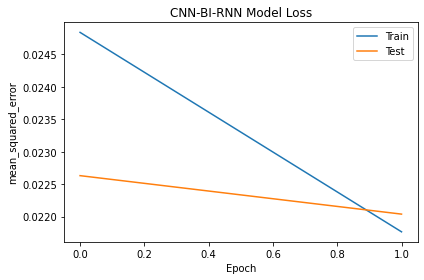

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_20 (TimeDi  (None, None, 5, 8)       16        
 stributed)                                                      
                                                                 
 time_distributed_21 (TimeDi  (None, None, 5, 4)       36        
 stributed)                                                      
                                                                 
 time_distributed_22 (TimeDi  (None, None, 2, 4)       0         
 stributed)                                                      
                                                                 
 time_distributed_23 (TimeDi  (None, None, 8)          0         
 stributed)                                                      
                                                                 
 bidirectional_3 (Bidirectio  (None, None, 50)       

In [27]:
predictor1 = HybridMultStepUniVar(sub_seq = 2, steps_past = 10, steps_future = 5, data = data, scale = 'normalize')
predictor1.create_cnnbirnn(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (25, 'relu'), 'layer4': (10, 'relu')})
predictor1.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor1.show_performance()
predictor1.predict(data.tail(10))
predictor1.model_blueprint()

Epoch 1/2
1650/1650 [==============================] - 9s 4ms/step - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0220 - val_mean_squared_error: 0.0220
Epoch 2/2
1650/1650 [==============================] - 7s 4ms/step - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0219 - val_mean_squared_error: 0.0219


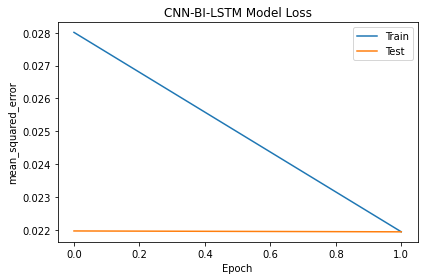

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_24 (TimeDi  (None, None, 5, 8)       16        
 stributed)                                                      
                                                                 
 time_distributed_25 (TimeDi  (None, None, 5, 4)       36        
 stributed)                                                      
                                                                 
 time_distributed_26 (TimeDi  (None, None, 2, 4)       0         
 stributed)                                                      
                                                                 
 time_distributed_27 (TimeDi  (None, None, 8)          0         
 stributed)                                                      
                                                                 
 bidirectional_4 (Bidirectio  (None, None, 50)       

In [28]:
predictor1 = HybridMultStepUniVar(sub_seq = 2, steps_past = 10, steps_future = 5, data = data, scale = 'normalize')
predictor1.create_cnnbilstm(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (25, 'relu'), 'layer4': (10, 'relu')})
predictor1.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor1.show_performance()
predictor1.predict(data.tail(10))
predictor1.model_blueprint()

Epoch 1/7
1650/1650 [==============================] - 9s 4ms/step - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 2/7
1650/1650 [==============================] - 6s 4ms/step - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch 3/7
1650/1650 [==============================] - 6s 4ms/step - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 4/7
1650/1650 [==============================] - 6s 4ms/step - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0218 - val_mean_squared_error: 0.0218
Epoch 4: early stopping


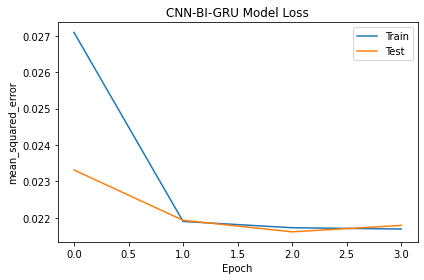

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_28 (TimeDi  (None, None, 5, 8)       16        
 stributed)                                                      
                                                                 
 time_distributed_29 (TimeDi  (None, None, 5, 4)       36        
 stributed)                                                      
                                                                 
 time_distributed_30 (TimeDi  (None, None, 2, 4)       0         
 stributed)                                                      
                                                                 
 time_distributed_31 (TimeDi  (None, None, 8)          0         
 stributed)                                                      
                                                                 
 bidirectional_5 (Bidirectio  (None, None, 50)       

In [29]:
predictor1 = HybridMultStepUniVar(sub_seq = 2, steps_past = 10, steps_future = 5, data = data, scale = 'normalize')
predictor1.create_cnnbigru(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (25, 'relu'), 'layer4': (10, 'relu')})
predictor1.fit_model(epochs = 7, show_progress= 1, validation_split = 0.20, batch_size = 10, monitor='val_loss', patience=1, min_delta = 0, verbose = 1)
predictor1.show_performance()
predictor1.predict(data.tail(10))
predictor1.model_blueprint()

In [30]:
predictor1.save_model()

INFO:tensorflow:Assets written to: C:\Users\Max\Desktop\inProgress\AImbriumTestingGround\assets


INFO:tensorflow:Assets written to: C:\Users\Max\Desktop\inProgress\AImbriumTestingGround\assets


In [31]:
load = HybridMultStepUniVar(sub_seq = 2, steps_past =  10, steps_future = 5)

In [32]:
load.set_model_id('Loaded Model')

In [33]:
load.load_model('univarhybrid')

In [34]:
load.predict(data.tail(10))

,Loaded Model
0,0.807289
1,0.775328
2,0.768437
3,0.768539
4,0.744711


## MultiVarMultiStep

In [6]:
from imbrium.predictors.multivarstandard import *

In [36]:
data = pd.read_csv('CaliforniaHousing.csv')

Epoch 1/7
1651/1651 [==============================] - 3s 2ms/step - loss: 3.1047 - mean_squared_error: 3.1047 - val_loss: 1.0895 - val_mean_squared_error: 1.0895
Epoch 2/7
1651/1651 [==============================] - 3s 2ms/step - loss: 0.6369 - mean_squared_error: 0.6369 - val_loss: 0.4875 - val_mean_squared_error: 0.4875
Epoch 3/7
1651/1651 [==============================] - 3s 2ms/step - loss: 0.4847 - mean_squared_error: 0.4847 - val_loss: 0.4659 - val_mean_squared_error: 0.4659
Epoch 4/7
1651/1651 [==============================] - 3s 2ms/step - loss: 0.4780 - mean_squared_error: 0.4780 - val_loss: 0.4663 - val_mean_squared_error: 0.4663
Epoch 4: early stopping


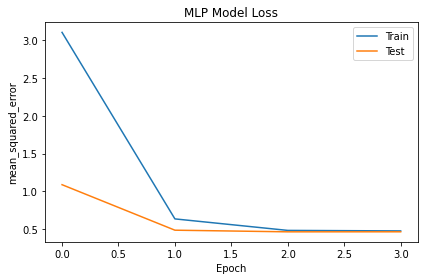

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 5)                 105       
                                                                 
 dense_24 (Dense)            (None, 5)                 30        
                                                                 
 dense_25 (Dense)            (None, 5)                 30        
                                                                 
 dense_26 (Dense)            (None, 10)                60        
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [37]:
predictor1 = BasicMultStepMultVar(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = '')
#predictor1.get_X_input
predictor1.create_mlp(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (5, 'relu'), 'layer1': (5,'relu'), 'layer2': (5, 'relu')})
predictor1.fit_model(epochs = 7, show_progress= 1, validation_split = 0.20, batch_size = 10, monitor='val_loss', patience=1, min_delta = 0, verbose = 1)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

Epoch 1/10
1651/1651 [==============================] - 9s 5ms/step - loss: 1.6080 - mean_squared_error: 1.6080 - val_loss: 1.0604 - val_mean_squared_error: 1.0604
Epoch 2/10
1651/1651 [==============================] - 7s 4ms/step - loss: 0.6177 - mean_squared_error: 0.6177 - val_loss: 0.5980 - val_mean_squared_error: 0.5980
Epoch 3/10
1651/1651 [==============================] - 7s 4ms/step - loss: 0.5692 - mean_squared_error: 0.5692 - val_loss: 0.5545 - val_mean_squared_error: 0.5545
Epoch 4/10
1651/1651 [==============================] - 7s 4ms/step - loss: 0.5558 - mean_squared_error: 0.5558 - val_loss: 0.5219 - val_mean_squared_error: 0.5219
Epoch 5/10
1651/1651 [==============================] - 7s 4ms/step - loss: 0.5441 - mean_squared_error: 0.5441 - val_loss: 0.5329 - val_mean_squared_error: 0.5329
Epoch 6/10
1651/1651 [==============================] - 7s 4ms/step - loss: 0.5301 - mean_squared_error: 0.5301 - val_loss: 0.5090 - val_mean_squared_error: 0.5090
Epoch 7/10
1651/

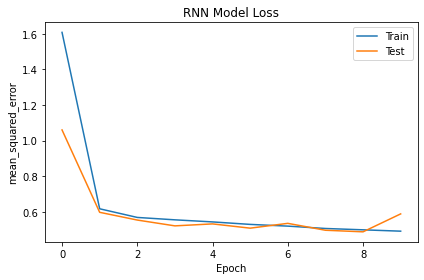

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_15 (SimpleRNN)   (None, 5, 5)              50        
                                                                 
 simple_rnn_16 (SimpleRNN)   (None, 5, 5)              55        
                                                                 
 simple_rnn_17 (SimpleRNN)   (None, 5)                 55        
                                                                 
 dense_27 (Dense)            (None, 10)                60        
                                                                 
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________


In [38]:
predictor1 = BasicMultStepMultVar(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor1.create_rnn(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (5, 'relu'), 'layer1': (5,'relu'), 'layer2': (5, 'relu')})
predictor1.fit_model(epochs = 10, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

Epoch 1/7
1651/1651 [==============================] - 16s 8ms/step - loss: 0.9093 - mean_squared_error: 0.9093 - val_loss: 0.4910 - val_mean_squared_error: 0.4910
Epoch 2/7
1651/1651 [==============================] - 12s 7ms/step - loss: 0.4864 - mean_squared_error: 0.4864 - val_loss: 0.4548 - val_mean_squared_error: 0.4548
Epoch 3/7
1651/1651 [==============================] - 12s 7ms/step - loss: 0.4634 - mean_squared_error: 0.4634 - val_loss: 0.4548 - val_mean_squared_error: 0.4548
Epoch 3: early stopping


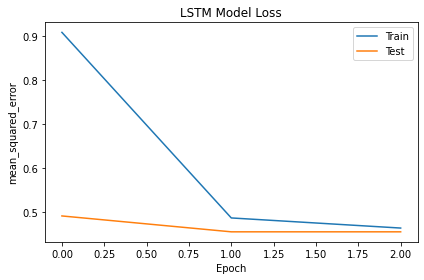

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 5, 5)              200       
                                                                 
 lstm_14 (LSTM)              (None, 5, 5)              220       
                                                                 
 lstm_15 (LSTM)              (None, 5)                 220       
                                                                 
 dense_28 (Dense)            (None, 10)                60        
                                                                 
Total params: 700
Trainable params: 700
Non-trainable params: 0
_________________________________________________________________


In [39]:
predictor1 = BasicMultStepMultVar(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'standard')
predictor1.create_lstm(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (5, 'relu'), 'layer1': (5,'relu'), 'layer2': (5, 'relu')})
predictor1.fit_model(epochs = 7, show_progress= 1, validation_split = 0.20, batch_size = 10, monitor='val_loss', patience=1, min_delta = 0, verbose = 1)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

In [16]:
from imbrium.predictors.univarhybrid import HybridMultStepUniVar

predictor = HybridMultStepUniVar(sub_seq = 2, steps_past = 10, steps_future = 5,
                                  data = data, scale = 'minmax')

predictor.create_cnnbilstm(optimizer= 'adam', loss= 'mean_squared_error',
                            metrics = 'mean_squared_error'
                           )

predictor.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20, batch_size = 10)

predictor.predict(data.tail(10))

Epoch 1/2
1650/1650 [==============================] - 10s 5ms/step - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 2/2
1650/1650 [==============================] - 7s 5ms/step - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0214 - val_mean_squared_error: 0.0214


,CNN-BI-LSTM
0,0.309049
1,0.345197
2,0.334620
3,0.370089
4,0.343645


Epoch 1/2
1651/1651 [==============================] - 4s 2ms/step - loss: 0.6719 - mean_squared_error: 0.6719 - val_loss: 0.5525 - val_mean_squared_error: 0.5525
Epoch 2/2
1651/1651 [==============================] - 4s 2ms/step - loss: 0.5471 - mean_squared_error: 0.5471 - val_loss: 0.5265 - val_mean_squared_error: 0.5265


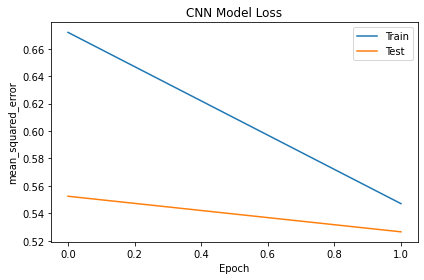

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 5, 64)             320       
                                                                 
 conv1d_19 (Conv1D)          (None, 5, 32)             2080      
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 2, 32)            0         
 1D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 50)                3250      
                                                                 
 dense_30 (Dense)            (None, 10)                510       
                                                     

In [40]:
predictor1 = BasicMultStepMultVar(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'minmax')
predictor1.create_cnn(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (64, 1, 'relu'), 'layer1': (32, 1, 'relu'), 'layer2': (2), 'layer3': (50, 'relu')})
predictor1.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

Epoch 1/2
1651/1651 [==============================] - 15s 7ms/step - loss: 1.0449 - mean_squared_error: 1.0449 - val_loss: 0.5257 - val_mean_squared_error: 0.5257
Epoch 2/2
1651/1651 [==============================] - 11s 7ms/step - loss: 0.5111 - mean_squared_error: 0.5111 - val_loss: 0.4786 - val_mean_squared_error: 0.4786


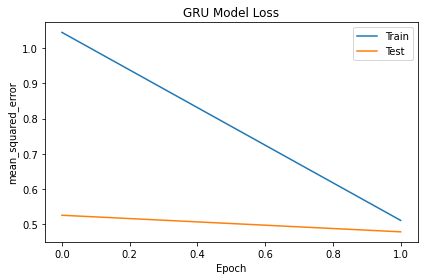

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_15 (GRU)                (None, 5, 5)              165       
                                                                 
 gru_16 (GRU)                (None, 5, 5)              180       
                                                                 
 gru_17 (GRU)                (None, 5)                 180       
                                                                 
 dense_31 (Dense)            (None, 10)                60        
                                                                 
Total params: 585
Trainable params: 585
Non-trainable params: 0
_________________________________________________________________


In [41]:
predictor1 = BasicMultStepMultVar(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'maxabs')
predictor1.create_gru(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (5, 'relu'), 'layer1': (5,'relu'), 'layer2': (5, 'relu')})
predictor1.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

Epoch 1/2
1651/1651 [==============================] - 8s 4ms/step - loss: 1.3251 - mean_squared_error: 1.3251 - val_loss: 0.5869 - val_mean_squared_error: 0.5869
Epoch 2/2
1651/1651 [==============================] - 6s 4ms/step - loss: 0.5562 - mean_squared_error: 0.5562 - val_loss: 0.5214 - val_mean_squared_error: 0.5214


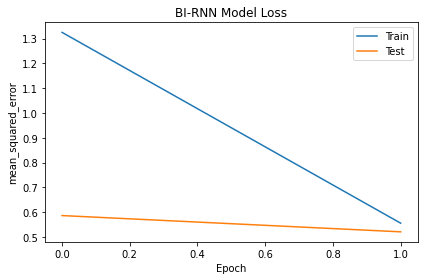

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 5, 10)            100       
 nal)                                                            
                                                                 
 simple_rnn_19 (SimpleRNN)   (None, 5)                 80        
                                                                 
 dense_32 (Dense)            (None, 10)                60        
                                                                 
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


In [42]:
predictor1 = BasicMultStepMultVar(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor1.create_birnn(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (5, 'relu'), 'layer1': (5, 'relu')})
predictor1.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

Epoch 1/2
1651/1651 [==============================] - 13s 6ms/step - loss: 1.2770 - mean_squared_error: 1.2770 - val_loss: 0.5098 - val_mean_squared_error: 0.5098
Epoch 2/2
1651/1651 [==============================] - 10s 6ms/step - loss: 0.5191 - mean_squared_error: 0.5191 - val_loss: 0.5096 - val_mean_squared_error: 0.5096


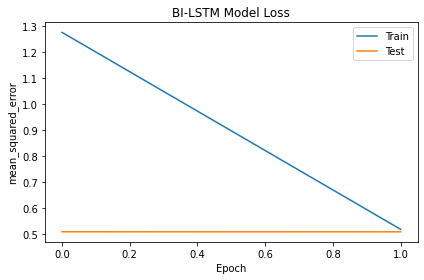

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_7 (Bidirectio  (None, 5, 10)            400       
 nal)                                                            
                                                                 
 lstm_17 (LSTM)              (None, 5)                 320       
                                                                 
 dense_33 (Dense)            (None, 10)                60        
                                                                 
Total params: 780
Trainable params: 780
Non-trainable params: 0
_________________________________________________________________


In [43]:
predictor1 = BasicMultStepMultVar(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor1.create_bilstm(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (5, 'relu'), 'layer1': (5, 'relu')})
predictor1.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

Epoch 1/7
1651/1651 [==============================] - 16s 8ms/step - loss: 1.5595 - mean_squared_error: 1.5595 - val_loss: 1.0415 - val_mean_squared_error: 1.0415
Epoch 2/7
1651/1651 [==============================] - 13s 8ms/step - loss: 0.6248 - mean_squared_error: 0.6248 - val_loss: 0.5917 - val_mean_squared_error: 0.5917
Epoch 3/7
1651/1651 [==============================] - 12s 8ms/step - loss: 0.5207 - mean_squared_error: 0.5207 - val_loss: 0.4916 - val_mean_squared_error: 0.4916
Epoch 4/7
1651/1651 [==============================] - 12s 7ms/step - loss: 0.5027 - mean_squared_error: 0.5027 - val_loss: 0.4814 - val_mean_squared_error: 0.4814
Epoch 5/7
1651/1651 [==============================] - 12s 7ms/step - loss: 0.4927 - mean_squared_error: 0.4927 - val_loss: 0.4759 - val_mean_squared_error: 0.4759
Epoch 6/7
1651/1651 [==============================] - 12s 7ms/step - loss: 0.4883 - mean_squared_error: 0.4883 - val_loss: 0.4814 - val_mean_squared_error: 0.4814
Epoch 6: early s

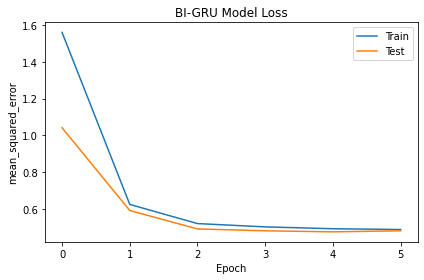

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_8 (Bidirectio  (None, 5, 10)            330       
 nal)                                                            
                                                                 
 gru_19 (GRU)                (None, 5)                 255       
                                                                 
 dense_34 (Dense)            (None, 10)                60        
                                                                 
Total params: 645
Trainable params: 645
Non-trainable params: 0
_________________________________________________________________


In [44]:
predictor1 = BasicMultStepMultVar(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor1.create_bigru(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (5, 'relu'), 'layer1': (5, 'relu')})
predictor1.fit_model(epochs = 7, show_progress= 1, validation_split = 0.20, batch_size = 10, monitor='val_loss', patience=1, min_delta = 0, verbose = 1)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

Epoch 1/7
1651/1651 [==============================] - 21s 11ms/step - loss: 1.0869 - mean_squared_error: 1.0869 - val_loss: 0.5728 - val_mean_squared_error: 0.5728
Epoch 2/7
1651/1651 [==============================] - 19s 11ms/step - loss: 0.5480 - mean_squared_error: 0.5480 - val_loss: 0.5129 - val_mean_squared_error: 0.5129
Epoch 3/7
1651/1651 [==============================] - 19s 12ms/step - loss: 0.5092 - mean_squared_error: 0.5092 - val_loss: 0.4966 - val_mean_squared_error: 0.4966
Epoch 4/7
1651/1651 [==============================] - 19s 11ms/step - loss: 0.4970 - mean_squared_error: 0.4970 - val_loss: 0.4649 - val_mean_squared_error: 0.4649
Epoch 5/7
1651/1651 [==============================] - 19s 11ms/step - loss: 0.4893 - mean_squared_error: 0.4893 - val_loss: 0.4709 - val_mean_squared_error: 0.4709
Epoch 5: early stopping


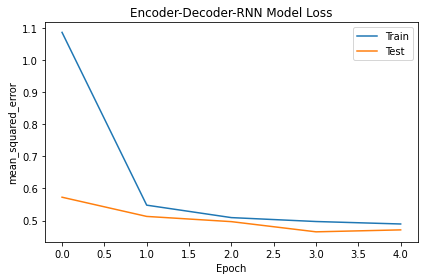

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_20 (SimpleRNN)   (None, 5, 5)              50        
                                                                 
 simple_rnn_21 (SimpleRNN)   (None, 5)                 55        
                                                                 
 repeat_vector_4 (RepeatVect  (None, 10, 5)            0         
 or)                                                             
                                                                 
 simple_rnn_22 (SimpleRNN)   (None, 10, 5)             55        
                                                                 
 simple_rnn_23 (SimpleRNN)   (None, 10, 100)           10600     
                                                                 
 time_distributed_32 (TimeDi  (None, 10, 1)            101       
 stributed)                                          

In [45]:
predictor9 = BasicMultStepMultVar(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor9.create_encdec_rnn(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (5, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (100, 'relu')})
predictor9.fit_model(epochs = 7, show_progress= 1, validation_split = 0.20, batch_size = 10, monitor='val_loss', patience=1, min_delta = 0, verbose = 1)
predictor9.show_performance()
predictor9.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor9.model_blueprint()

Epoch 1/10
1651/1651 [==============================] - 31s 17ms/step - loss: 1.3630 - mean_squared_error: 1.3630 - val_loss: 1.1993 - val_mean_squared_error: 1.1993
Epoch 2/10
1651/1651 [==============================] - 28s 17ms/step - loss: 0.7997 - mean_squared_error: 0.7997 - val_loss: 0.6214 - val_mean_squared_error: 0.6214
Epoch 3/10
1651/1651 [==============================] - 27s 17ms/step - loss: 0.5941 - mean_squared_error: 0.5941 - val_loss: 0.5445 - val_mean_squared_error: 0.5445
Epoch 4/10
1651/1651 [==============================] - 27s 17ms/step - loss: 0.5596 - mean_squared_error: 0.5596 - val_loss: 0.5340 - val_mean_squared_error: 0.5340
Epoch 5/10
1651/1651 [==============================] - 27s 16ms/step - loss: 0.5476 - mean_squared_error: 0.5476 - val_loss: 0.5306 - val_mean_squared_error: 0.5306
Epoch 6/10
1651/1651 [==============================] - 26s 16ms/step - loss: 0.5443 - mean_squared_error: 0.5443 - val_loss: 0.5406 - val_mean_squared_error: 0.5406
Epoc

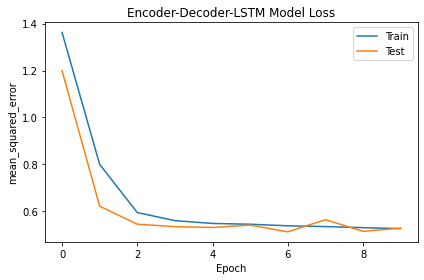

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 5, 5)              200       
                                                                 
 lstm_19 (LSTM)              (None, 5)                 220       
                                                                 
 repeat_vector_5 (RepeatVect  (None, 10, 5)            0         
 or)                                                             
                                                                 
 lstm_20 (LSTM)              (None, 10, 5)             220       
                                                                 
 lstm_21 (LSTM)              (None, 10, 100)           42400     
                                                                 
 time_distributed_33 (TimeDi  (None, 10, 1)            101       
 stributed)                                          

In [46]:
predictor10 = BasicMultStepMultVar(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor10.create_encdec_lstm(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (5, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (100, 'relu')})
predictor10.fit_model(epochs = 10, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor10.show_performance()
predictor10.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor10.model_blueprint()

Epoch 1/2
1651/1651 [==============================] - 18s 10ms/step - loss: 1.4738 - mean_squared_error: 1.4738 - val_loss: 1.4295 - val_mean_squared_error: 1.4295
Epoch 2/2
1651/1651 [==============================] - 15s 9ms/step - loss: 0.9083 - mean_squared_error: 0.9083 - val_loss: 0.5777 - val_mean_squared_error: 0.5777


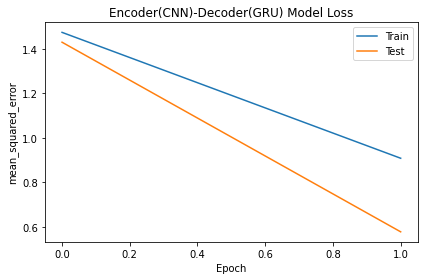

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 5, 8)              40        
                                                                 
 conv1d_21 (Conv1D)          (None, 5, 4)              36        
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 2, 4)             0         
 g1D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 8)                 0         
                                                                 
 repeat_vector_6 (RepeatVect  (None, 10, 8)            0         
 or)                                                             
                                                                 
 gru_20 (GRU)                (None, 10, 5)           

In [47]:
predictor11 = BasicMultStepMultVar(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor11.create_encdec_cnn(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (10, 'relu')})
predictor11.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor11.show_performance()
predictor11.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor11.model_blueprint()

Epoch 1/7
1651/1651 [==============================] - 32s 17ms/step - loss: 1.1291 - mean_squared_error: 1.1291 - val_loss: 0.5412 - val_mean_squared_error: 0.5412
Epoch 2/7
1651/1651 [==============================] - 27s 17ms/step - loss: 0.5472 - mean_squared_error: 0.5472 - val_loss: 0.6417 - val_mean_squared_error: 0.6417
Epoch 2: early stopping


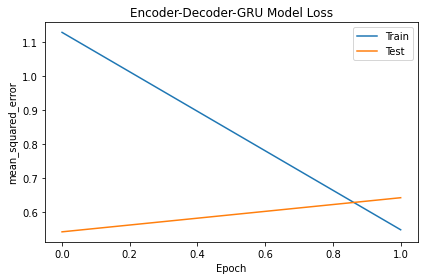

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_22 (GRU)                (None, 5, 5)              165       
                                                                 
 gru_23 (GRU)                (None, 5)                 180       
                                                                 
 repeat_vector_7 (RepeatVect  (None, 10, 5)            0         
 or)                                                             
                                                                 
 gru_24 (GRU)                (None, 10, 5)             180       
                                                                 
 gru_25 (GRU)                (None, 10, 100)           32100     
                                                                 
 time_distributed_35 (TimeDi  (None, 10, 1)            101       
 stributed)                                          

In [48]:
predictor12 = BasicMultStepMultVar(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor12.create_encdec_gru(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (5, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (100, 'relu')})
predictor12.fit_model(epochs = 7, show_progress= 1, validation_split = 0.20, batch_size = 10, monitor='val_loss', patience=1, min_delta = 0, verbose = 1)
predictor12.show_performance()
predictor12.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor12.model_blueprint()

In [49]:
predictor1.save_model()

INFO:tensorflow:Assets written to: C:\Users\Max\Desktop\inProgress\AImbriumTestingGround\assets


INFO:tensorflow:Assets written to: C:\Users\Max\Desktop\inProgress\AImbriumTestingGround\assets


In [50]:
load = BasicMultStepMultVar(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')

In [51]:
load.set_model_id('Loaded Model')

In [52]:
load.load_model('multivarstandard')

In [53]:
load.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))

,Loaded Model
0,0.700824
1,0.825675
2,0.831960
3,0.911161
4,0.885898
5,0.870906
6,0.887843
7,0.917939
8,0.928219
9,0.956057


In [8]:
from imbrium.predictors.multivarhybrid import HybridMultStepMultVar

Epoch 1/3
1651/1651 [==============================] - 8s 4ms/step - loss: 1.4027 - mean_squared_error: 1.4027 - val_loss: 1.4007 - val_mean_squared_error: 1.4007
Epoch 2/3
1651/1651 [==============================] - 6s 3ms/step - loss: 1.2317 - mean_squared_error: 1.2317 - val_loss: 1.3934 - val_mean_squared_error: 1.3934
Epoch 3/3
1651/1651 [==============================] - 6s 3ms/step - loss: 1.1407 - mean_squared_error: 1.1407 - val_loss: 1.1113 - val_mean_squared_error: 1.1113


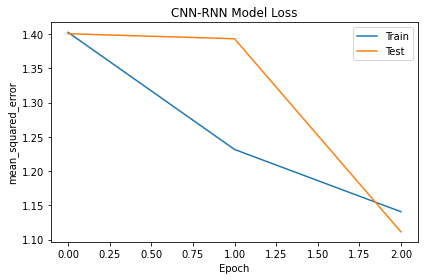

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_36 (TimeDi  (None, 2, 20, 8)         16        
 stributed)                                                      
                                                                 
 time_distributed_37 (TimeDi  (None, 2, 20, 4)         36        
 stributed)                                                      
                                                                 
 time_distributed_38 (TimeDi  (None, 2, 10, 4)         0         
 stributed)                                                      
                                                                 
 time_distributed_39 (TimeDi  (None, 2, 40)            0         
 stributed)                                                      
                                                                 
 simple_rnn_24 (SimpleRNN)   (None, 2, 5)            

In [55]:
predictor1 = HybridMultStepMultVar(sub_seq = 2, steps_past = 10, steps_future = 5, data = data,features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
#predictor1.get_X_input
predictor1.create_cnnrnn(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')})
predictor1.fit_model(epochs = 3, show_progress= 1, validation_split = 0.20, batch_size = 10, monitor='val_loss', patience=1, min_delta = 0, verbose = 1)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(10))
predictor1.model_blueprint()

Epoch 1/2
1651/1651 [==============================] - 9s 4ms/step - loss: 1.0607 - mean_squared_error: 1.0607 - val_loss: 0.5044 - val_mean_squared_error: 0.5044
Epoch 2/2
1651/1651 [==============================] - 7s 4ms/step - loss: 0.4892 - mean_squared_error: 0.4892 - val_loss: 0.5100 - val_mean_squared_error: 0.5100


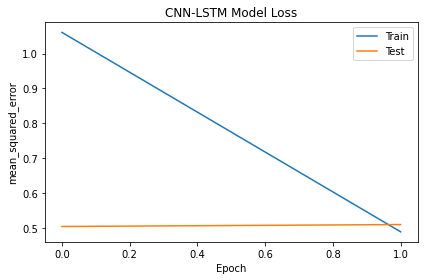

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_40 (TimeDi  (None, 2, 20, 8)         16        
 stributed)                                                      
                                                                 
 time_distributed_41 (TimeDi  (None, 2, 20, 4)         36        
 stributed)                                                      
                                                                 
 time_distributed_42 (TimeDi  (None, 2, 10, 4)         0         
 stributed)                                                      
                                                                 
 time_distributed_43 (TimeDi  (None, 2, 40)            0         
 stributed)                                                      
                                                                 
 lstm_22 (LSTM)              (None, 2, 5)            

In [56]:
predictor1 = HybridMultStepMultVar(sub_seq = 2, steps_past = 10, steps_future = 5, data = data,features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'])
predictor1.create_cnnlstm(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')})
predictor1.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(10))
predictor1.model_blueprint()

Epoch 1/10
1651/1651 [==============================] - 10s 5ms/step - loss: 1.5356 - mean_squared_error: 1.5356 - val_loss: 1.4625 - val_mean_squared_error: 1.4625
Epoch 2/10
1651/1651 [==============================] - 7s 4ms/step - loss: 1.2506 - mean_squared_error: 1.2506 - val_loss: 1.4932 - val_mean_squared_error: 1.4932
Epoch 3/10
1651/1651 [==============================] - 7s 4ms/step - loss: 1.2242 - mean_squared_error: 1.2242 - val_loss: 1.4245 - val_mean_squared_error: 1.4245
Epoch 4/10
1651/1651 [==============================] - 7s 4ms/step - loss: 1.0048 - mean_squared_error: 1.0048 - val_loss: 0.7350 - val_mean_squared_error: 0.7350
Epoch 5/10
1651/1651 [==============================] - 7s 4ms/step - loss: 0.5846 - mean_squared_error: 0.5846 - val_loss: 0.5312 - val_mean_squared_error: 0.5312
Epoch 6/10
1651/1651 [==============================] - 7s 4ms/step - loss: 0.5357 - mean_squared_error: 0.5357 - val_loss: 0.5028 - val_mean_squared_error: 0.5028
Epoch 7/10
1651

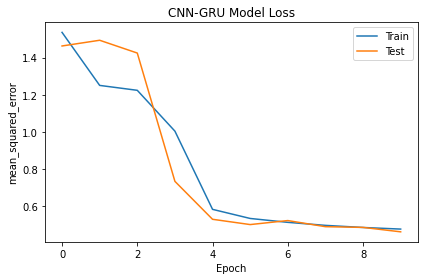

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_44 (TimeDi  (None, 2, 20, 8)         16        
 stributed)                                                      
                                                                 
 time_distributed_45 (TimeDi  (None, 2, 20, 4)         36        
 stributed)                                                      
                                                                 
 time_distributed_46 (TimeDi  (None, 2, 10, 4)         0         
 stributed)                                                      
                                                                 
 time_distributed_47 (TimeDi  (None, 2, 40)            0         
 stributed)                                                      
                                                                 
 gru_26 (GRU)                (None, 2, 5)            

In [57]:
predictor1 = HybridMultStepMultVar(sub_seq = 2, steps_past = 10, steps_future = 5, data = data,features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor1.create_cnngru(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')})
predictor1.fit_model(epochs = 10, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(10))
predictor1.model_blueprint()

Epoch 1/2
1651/1651 [==============================] - 9s 4ms/step - loss: 1.7513 - mean_squared_error: 1.7513 - val_loss: 1.5159 - val_mean_squared_error: 1.5159
Epoch 2/2
1651/1651 [==============================] - 6s 4ms/step - loss: 1.2271 - mean_squared_error: 1.2271 - val_loss: 1.4143 - val_mean_squared_error: 1.4143


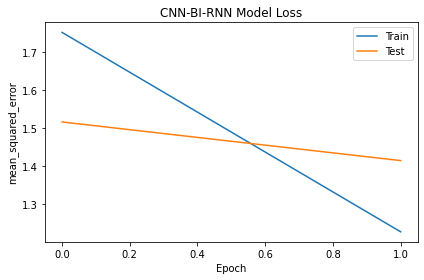

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_48 (TimeDi  (None, 2, 20, 8)         16        
 stributed)                                                      
                                                                 
 time_distributed_49 (TimeDi  (None, 2, 20, 4)         36        
 stributed)                                                      
                                                                 
 time_distributed_50 (TimeDi  (None, 2, 10, 4)         0         
 stributed)                                                      
                                                                 
 time_distributed_51 (TimeDi  (None, 2, 40)            0         
 stributed)                                                      
                                                                 
 bidirectional_9 (Bidirectio  (None, 2, 10)          

In [58]:
predictor1 = HybridMultStepMultVar(sub_seq = 2, steps_past = 10, steps_future = 5, data = data,features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor1.create_cnnbirnn(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')})
predictor1.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(10))
predictor1.model_blueprint()

Epoch 1/2
1651/1651 [==============================] - 12s 5ms/step - loss: 1.5997 - mean_squared_error: 1.5997 - val_loss: 1.4662 - val_mean_squared_error: 1.4662
Epoch 2/2
1651/1651 [==============================] - 8s 5ms/step - loss: 1.2586 - mean_squared_error: 1.2586 - val_loss: 1.4432 - val_mean_squared_error: 1.4432


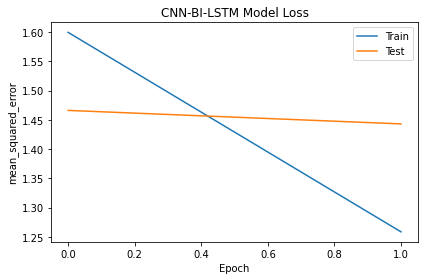

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_52 (TimeDi  (None, 2, 20, 8)         16        
 stributed)                                                      
                                                                 
 time_distributed_53 (TimeDi  (None, 2, 20, 4)         36        
 stributed)                                                      
                                                                 
 time_distributed_54 (TimeDi  (None, 2, 10, 4)         0         
 stributed)                                                      
                                                                 
 time_distributed_55 (TimeDi  (None, 2, 40)            0         
 stributed)                                                      
                                                                 
 bidirectional_10 (Bidirecti  (None, 2, 10)          

In [59]:
predictor1 = HybridMultStepMultVar(sub_seq = 2, steps_past = 10, steps_future = 5, data = data,features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor1.create_cnnbilstm(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')})
predictor1.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(10))
predictor1.model_blueprint()

Epoch 1/7
1651/1651 [==============================] - 12s 5ms/step - loss: 1.5261 - mean_squared_error: 1.5261 - val_loss: 1.4522 - val_mean_squared_error: 1.4522
Epoch 2/7
1651/1651 [==============================] - 8s 5ms/step - loss: 1.2398 - mean_squared_error: 1.2398 - val_loss: 1.4312 - val_mean_squared_error: 1.4312
Epoch 3/7
1651/1651 [==============================] - 9s 5ms/step - loss: 1.1432 - mean_squared_error: 1.1432 - val_loss: 1.1477 - val_mean_squared_error: 1.1477
Epoch 4/7
1651/1651 [==============================] - 8s 5ms/step - loss: 0.5805 - mean_squared_error: 0.5805 - val_loss: 0.5040 - val_mean_squared_error: 0.5040
Epoch 5/7
1651/1651 [==============================] - 8s 5ms/step - loss: 0.4931 - mean_squared_error: 0.4931 - val_loss: 0.4724 - val_mean_squared_error: 0.4724
Epoch 6/7
1651/1651 [==============================] - 8s 5ms/step - loss: 0.4827 - mean_squared_error: 0.4827 - val_loss: 0.4706 - val_mean_squared_error: 0.4706
Epoch 7/7
1651/1651 [

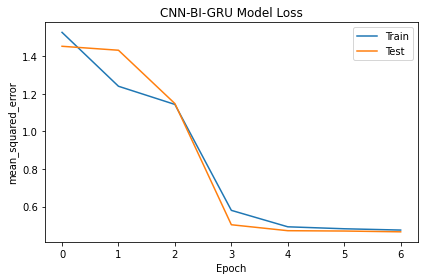

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_56 (TimeDi  (None, 2, 20, 8)         16        
 stributed)                                                      
                                                                 
 time_distributed_57 (TimeDi  (None, 2, 20, 4)         36        
 stributed)                                                      
                                                                 
 time_distributed_58 (TimeDi  (None, 2, 10, 4)         0         
 stributed)                                                      
                                                                 
 time_distributed_59 (TimeDi  (None, 2, 40)            0         
 stributed)                                                      
                                                                 
 bidirectional_11 (Bidirecti  (None, 2, 10)          

In [60]:
predictor1 = HybridMultStepMultVar(sub_seq = 2, steps_past = 10, steps_future = 5, data = data,features = ['target','target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor1.create_cnnbigru(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')})
predictor1.fit_model(epochs = 7, show_progress= 1, validation_split = 0.20, batch_size = 10, monitor='val_loss', patience=1, min_delta = 0, verbose = 1)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(10))
predictor1.model_blueprint()

In [61]:
#predictor1.save_model()

In [62]:
load = HybridMultStepMultVar(sub_seq = 2, steps_past =  10, steps_future = 5, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')

In [63]:
load.set_model_id('Loaded Model')

In [64]:
load.load_model('multivarhybrid')

In [65]:
load.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(10))

,Loaded Model
0,4.757035
1,4.669703
2,4.630210
3,4.547487
4,4.912946
